# EDA 
### \[Exploratory Data Analysis\] :
- This involves the process of **analyzing** and **visualizing the dataset** to *gain insights*,*indentify patterns* and *understand the underlying structure of the data* .
##### Importing libraries For EDA
- `pandas` to use it in data manipulation and analysis .
- `matplotlib` to use it for creating static visualizations for the data.


In [225]:
import pandas as pd 
import matplotlib.pyplot as plt

## Load The Dataset 
- We use `read_csv()` in *pandas* to **load the dataset** and **store it in an dataframe** object .
- We use `df.info()` to **get informations** about null values in each columns and the type of each one .

In [226]:
df = pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## RestingBP
- We get a **full description** of the column of `RestingBP` with `df['col'].describe()` .
- We make a **graph to visualize** our data of `RestingBP` with `age` .## RestingBP

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64


Text(0, 0.5, 'Age')

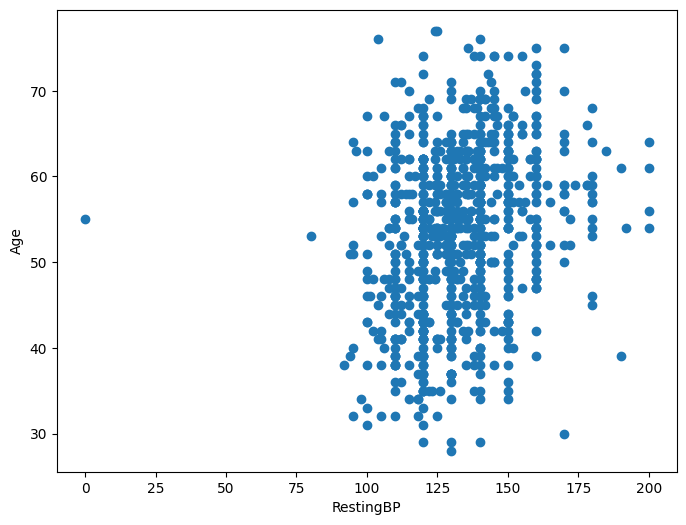

In [228]:
print(df['RestingBP'].describe())
plt.figure(figsize=(8,6))
plt.scatter(df['RestingBP'],df['Age'])
plt.xlabel("RestingBP")
plt.ylabel("Age")

### Drop RestingBP == 0
- We drop the rows which has the value zero in `RestingBP` .

In [229]:
df = df[df['RestingBP'] != 0]

Text(0, 0.5, 'Age')

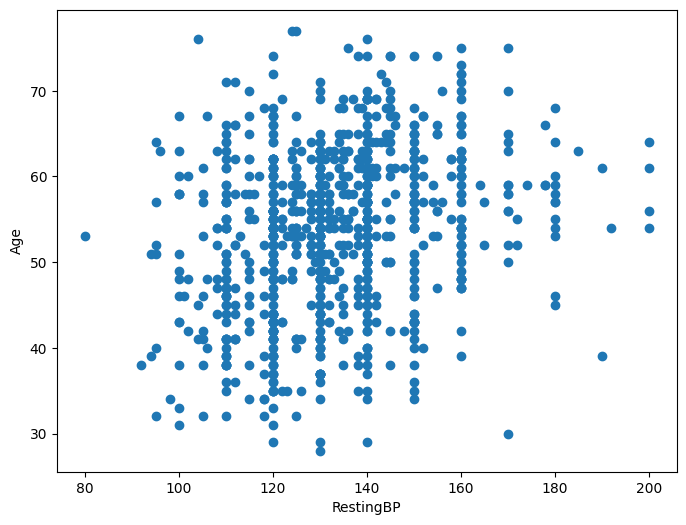

In [230]:
plt.figure(figsize=(8,6))
plt.scatter(df['RestingBP'],df['Age'])
plt.xlabel("RestingBP")
plt.ylabel("Age")

## Cholesterol
- We get a **full description** of the column of `Cholesterol` with `df['col'].describe()` .
- We make a **graph to visualize** our data of `Cholesterol` with `age` .

count    917.000000
mean     199.016358
std      109.246330
min        0.000000
25%      174.000000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64


Text(0, 0.5, 'Age')

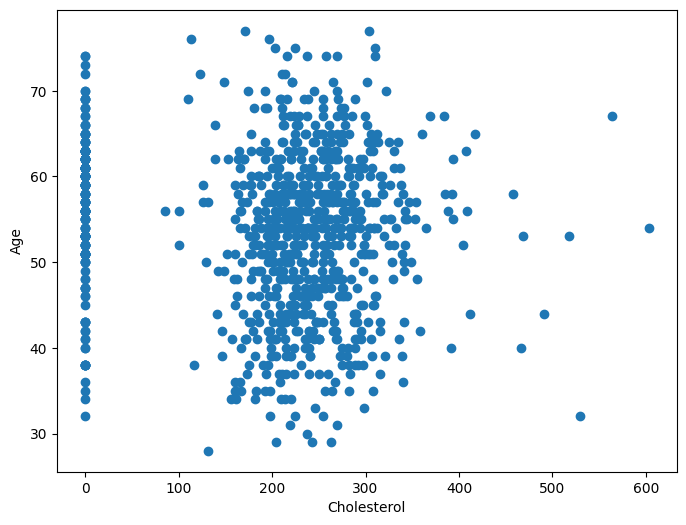

In [231]:
print(df['Cholesterol'].describe())
plt.figure(figsize=(8,6))
plt.scatter(df['Cholesterol'],df['Age'])
plt.xlabel("Cholesterol")
plt.ylabel("Age")

Text(0, 0.5, 'Age')

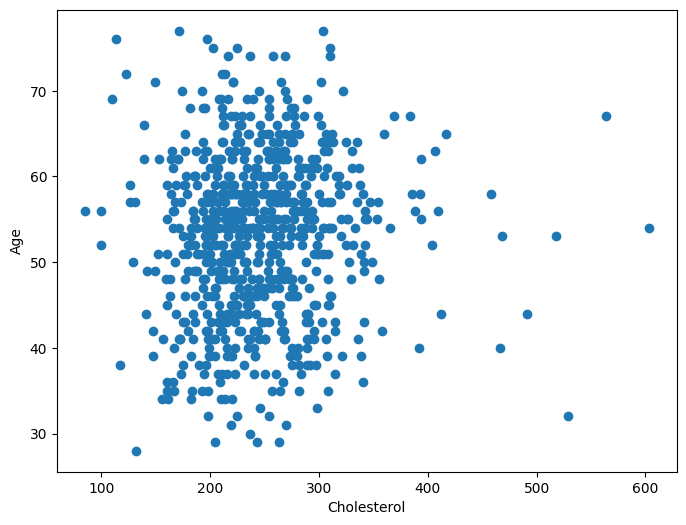

In [232]:
df = df[df['Cholesterol'] != 0]
plt.figure(figsize=(8,6))
plt.scatter(df['Cholesterol'],df['Age'])
plt.xlabel("Cholesterol")
plt.ylabel("Age")

## MaxHR
- We get a **full description** of the column of `MaxHR` with `df['col'].describe()` .
- We make a **graph to visualize** our data of `MaxHR` with `age` .

count    746.000000
mean     140.226542
std       24.524107
min       69.000000
25%      122.000000
50%      140.000000
75%      160.000000
max      202.000000
Name: MaxHR, dtype: float64


Text(0, 0.5, 'Age')

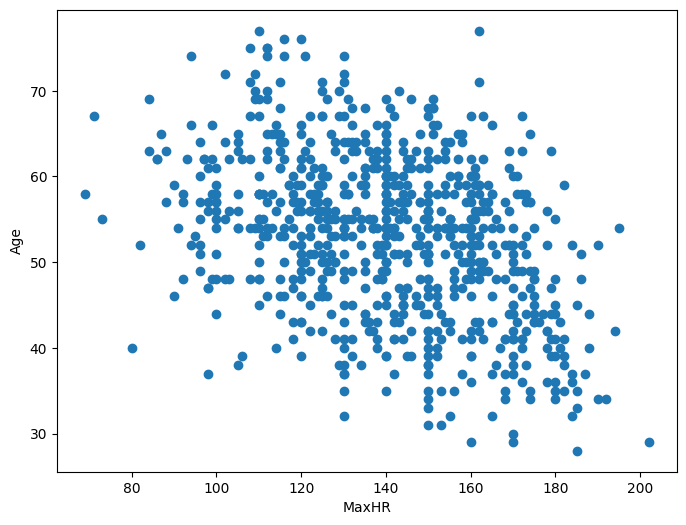

In [233]:
print(df['MaxHR'].describe())
plt.figure(figsize=(8,6))
plt.scatter(df['MaxHR'],df['Age'])
plt.xlabel("MaxHR")
plt.ylabel("Age")

# Preprocessing
- This step to **prepare the data** before giving it to the model to train and test.
- We use **two strategies to make it suitable for the model :**
    1. Use **`LabelEncoder`** to *encode the **categorical data** into **numerical data** .*
    2. Use **`MinMaxScaler`** to *make the data in **small ranges** to enhance the training of the model*.
    

In [234]:
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [235]:
Encoder = LabelEncoder()
#scalar = StandardScaler()
scalar = MinMaxScaler()

In [236]:
df['Sex'] = Encoder.fit_transform(df['Sex'])
df['ChestPainType'] = Encoder.fit_transform(df['ChestPainType'])
df['RestingECG'] = Encoder.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = Encoder.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = Encoder.fit_transform(df['ST_Slope'])

In [237]:
df[['MaxHR', 'Cholesterol', 'Age', 'RestingBP']] = scalar.fit_transform(df[['MaxHR', 'Cholesterol', 'Age', 'RestingBP']])

## Spliting The DataFrame
- We **split the dataframe** into input **`X`** and output **`y`** .
- This is to prepare train and test data from the dataframe .

In [238]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Models

In [239]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= .2, random_state=20)

# LogisticRegression
- Define the object model `LogisticRegression()`
- Train the model `logreg.fit(X_train, y_train)`
- Get the accuracy of training `logreg.score(X_train, y_train)`
- Get the accuracy with test data `logreg.score(X_train, y_train)`

In [241]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log = round(logreg.score(X_train, y_train) * 100, 3)
log = round(logreg.score(X_test, y_test) * 100, 3)
print("Train: ", acc_log)
print("Test: ", log)

Train:  85.403
Test:  84.667


# RandomForestClassifier
- Define the object model `RandomForestClassifier(n_estimators=3,min_samples_split=8,max_depth=5)`
- Train the model `RandomForestClassifier.fit(X_train, y_train)`
- Get the accuracy of training `RandomForestClassifier.score(X_train, y_train)`
- Get the accuracy with test data `RandomForestClassifier.score(X_train, y_train)`

In [242]:
RandomForestClassifier = RandomForestClassifier(n_estimators=3,
                                                min_samples_split=8,
                                                max_depth=5)
RandomForestClassifier.fit(X_train, y_train)
acc_random_forest = round(RandomForestClassifier.score(X_train, y_train) * 100, 3) 
random_forest = round(RandomForestClassifier.score(X_test, y_test) * 100, 3) 
print("Train: ", acc_random_forest)
print("Test: ", random_forest)

Train:  88.758
Test:  86.667


# DecisionTreeClassifier

In [243]:
DecisionTreeClassifier = DecisionTreeClassifier(max_depth=2)
DecisionTreeClassifier.fit(X_train, y_train)
acc_decision_tree = round(DecisionTreeClassifier.score(X_train, y_train) * 100, 3)
decision_tree = round(DecisionTreeClassifier.score(X_test, y_test) * 100, 3)
print("Train: ",acc_decision_tree)
print("Test: ", decision_tree)

Train:  81.544
Test:  86.0


# GradientBoostingClassifier

In [244]:
GradientBoostingClassifier = GradientBoostingClassifier(
    learning_rate=0.01,
    max_depth=8,
    max_features=0.5,
    min_samples_leaf=17,
    min_samples_split=6,
    n_estimators=100,
    subsample=0.6,
    random_state=42
)
GradientBoostingClassifier.fit(X_train, y_train)
acc_GBC = round(GradientBoostingClassifier.score(X_train, y_train) * 100, 3)
GBC = round(GradientBoostingClassifier.score(X_test, y_test) * 100, 3)
print("Train: ", acc_GBC)
print("Test: ", GBC)

Train:  89.094
Test:  86.0


# ExtraTreesClassifier

In [245]:
ExtraTreesClassifier = ExtraTreesClassifier(
    bootstrap=False,
    max_features=0.2,
    min_samples_leaf=2,
    min_samples_split=13,
    n_estimators=100,
    random_state=20)
ExtraTreesClassifier.fit(X_train, y_train)
acc_extra_tree = round(ExtraTreesClassifier.score(X_train, y_train) * 100, 3)
extra_tree = round(ExtraTreesClassifier.score(X_test, y_test) * 100, 3)
print("Train: ", acc_extra_tree)
print("Test: ", extra_tree)

Train:  90.101
Test:  86.667


# Models accuracy

In [246]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Random Forest', 'Decision Tree', 'ExtraTreesClassifier','GradientBoostingClassifier'],
    
    'Training_score': [acc_log, acc_random_forest,
                       acc_decision_tree, acc_extra_tree,acc_GBC],
    
    'Testing_score' : [log, random_forest,
                       decision_tree, extra_tree,GBC]})

models.sort_values(by='Testing_score', ascending=False)

,Model,Training_score,Testing_score
1,Random Forest,88.758,86.667
3,ExtraTreesClassifier,90.101,86.667
2,Decision Tree,81.544,86.000
4,GradientBoostingClassifier,89.094,86.000
0,Logistic Regression,85.403,84.667


## Confusion Matrix
- First gets the prdicted values of `X_test`
- Second Makes a heatmap for the confusion matrix between `y_pred` and `y_test`

In [251]:
y_pred = RandomForestClassifier.predict(X_test)

<Axes: >

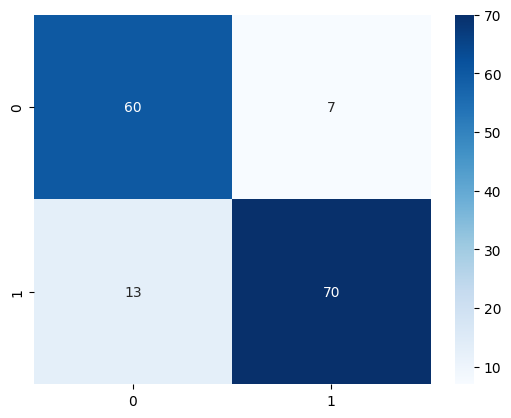

In [252]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap="Blues", annot=True)